<a href="https://colab.research.google.com/github/Meqqqiii/ML/blob/main/PyTorch_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import sklearn
import requests
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from pathlib import Path

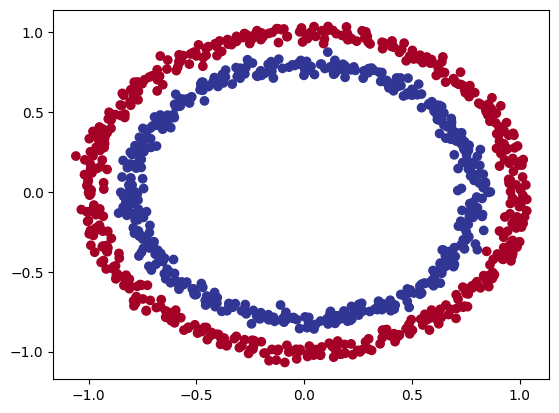

In [ ]:
n_samples = 1000

X,y = make_circles(n_samples, noise =0.03, random_state = 42)

len(X), len(y)

#print(f"First 5 samples pf X: {X[:5]}")
#print(f"First 5 samples of y: {y[:5]}")

#Make DataFrame of circles data

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label" :y})

circles.head(10)

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c=y,
            cmap = plt.cm.RdYlBu)

tensor([True, True, True, True, True])
Loss 0.6979604959487915 | Acc 40000.0 | Test Loss 0.6945955753326416 | Test Acc 57.49999999999999
Loss 0.6976765394210815 | Acc 40000.0 | Test Loss 0.6943801045417786 | Test Acc 57.99999999999999
Loss 0.6974151134490967 | Acc 40000.0 | Test Loss 0.6941847205162048 | Test Acc 57.49999999999999
Loss 0.697174072265625 | Acc 40000.0 | Test Loss 0.6940072774887085 | Test Acc 56.49999999999999
Loss 0.6969515085220337 | Acc 40000.0 | Test Loss 0.6938462853431702 | Test Acc 56.49999999999999
Loss 0.696745753288269 | Acc 40000.0 | Test Loss 0.6937000155448914 | Test Acc 56.00000000000001
Loss 0.6965552568435669 | Acc 40000.0 | Test Loss 0.6935670971870422 | Test Acc 56.00000000000001
Loss 0.696378767490387 | Acc 40000.0 | Test Loss 0.6934463381767273 | Test Acc 56.49999999999999
Loss 0.6962148547172546 | Acc 40000.0 | Test Loss 0.6933364868164062 | Test Acc 56.49999999999999
Loss 0.696062445640564 | Acc 40000.0 | Test Loss 0.6932365298271179 | Test Acc 55.

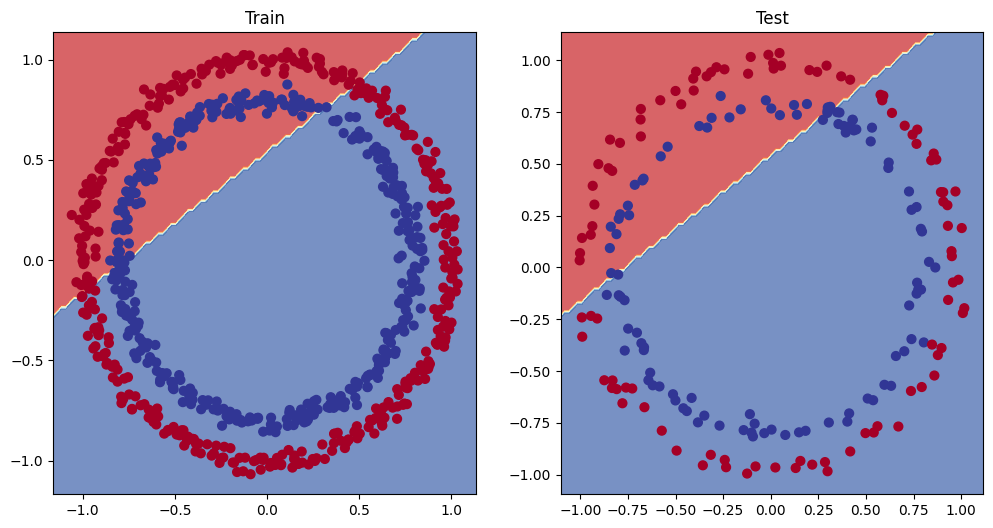

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

#splitting data - random split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, #20% is test and 80% train#
                                                    random_state = 42
                                                    )

len(X_train), len(y_train), len(X_test), len(y_test)

device = "cuda" if torch.cuda.is_available() else "cpu"

#now let's create a model(subclass from nn.module)
#create 2 nn.Linear() layers that are capable of handling th shapes pf our data
#define forward()
#instantiate an istnace of our model class and send it to our target device

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #Create 2 nn.Linear layers capable of handling shapes of our data
    # self.layer_1 = nn.Linear(in_features=2, out_features = 5) #takes in 2 features upscales it to 5
    # self.layer_2 = nn.Linear(in_features = 5, out_features=1) #takes in 5 and downscales it to 5
    #more headen features there are more opportunity model has to learn

    self.two_linear_layers = nn.Sequential( # same as normal way of writing it like above
        nn.Linear(in_features = 2, out_features = 5),
        nn.Linear(in_features = 5, out_features =1)
    ).to(device)
  def forward(self, x):
    #return self.layer_2(self.layer(x)) # x goes in to first layer and then output goes into layer 2
    return two_linear_layers(x)


#instantiate the model

model_0 = CircleModelV1().to(device)

#recreate the model using nn.Sequentual()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))



#which loss function and clasification should we use ?
#for clasification we might need binary cross entropy
# or categorical cross entropy (cross entropy)

loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built in
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


#our models outputs are going to be raw logits, to convert thpse logits to prediction porbabilities,
# we need to use activation function - sigmoid for binary clasification and softmax for multiclass clasification
#adter which we'll need to convert theese probabilities to prediction labels


y_logits = model_0(X_test.to(device)[:5])
y_logits
# we got our logits but they are not in the same format as our test  we have to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)

#to find pred. probability values we nee dto perform range-style rounding on them

#   y_pred_probs >= 0.5 y= 1 (class1)
#   y_pred_probs <= 0.5 y= 0 (class0)


# general way is logits -> prediction probabilities -> prediction labels
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))


torch.manual_seed(42)

epochs = 100
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  #Training
  model_0.train()

  #Forward pass
  y_logits = model_0(X_train).squeeze()

  #we should turn logits to prediction probabilities, since we have binary clasification we should use sigma
  y_pred_probs = torch.sigmoid(y_logits)

  #and finally should turn prediction probabilities into prediction labels
  y_labels = torch.round(y_pred_probs)



  #we can calculate accuracy not only loss
  loss = loss_fn(y_logits, y_train) #nn.BCEWithLogitsLoss expects raw logits as input
  #BCELoss expects prediction probabilities

  acc = accuracy_fn(y_true = y_train,
                    y_pred= y_pred_labels)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #calculate test loss / accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)
  if epoch % 10 ==0:
    print(f"Loss {loss} | Acc {acc} | Test Loss {test_loss} | Test Acc {test_acc}")



#model did not really learn anything, it's bit better than just guessing

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
      f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary




plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)


with visualaization of the data we can see that model tries to draw the straight line through the plane,
 that happens beacuse our model's layers are Linear layers but the data itself is circular


<generator object Module.parameters at 0x786b3e211cb0>
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0
Loss 0.6939550638198853 | Acc 50.875 | Test Loss 0.6926102638244629 | Test Acc 51.0


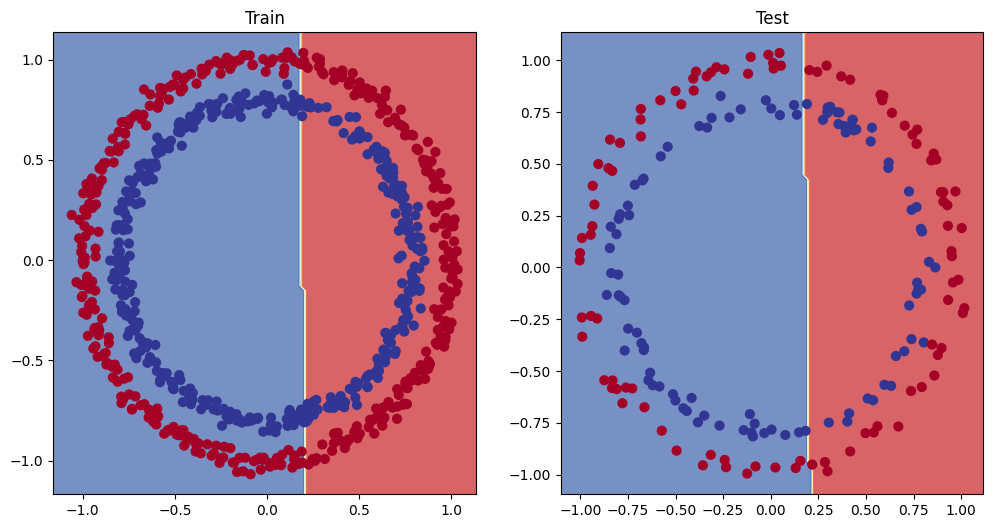

In [ ]:
# lets imporve the model
#adding more hidden units: 5 -> 10
#increase the number of layers: 2-> 3
#increas ethe number of epochs


#we should do them one by one to track the results

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features =10)
    self.layer3 = nn.Linear(in_features = 10, out_features =1)

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV2().to(device)


torch.manual_seed(42)
loss_fn = nn.BCEWithLogitsLoss()
print(model_1.parameters())
#optimizer =torch.optim.SGD(params = model_1.parameters(), lr =0.001)

epochs = 100
for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_labels = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_labels)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_predictions_logits = model_1(X_test).squeeze()
    y_prediction_labels = torch.round(torch.sigmoid(y_predictions_logits))
    loss_final = loss_fn(y_predictions_logits,y_test)
    acc_final = accuracy_fn(y_true=y_test,
                            y_pred = y_prediction_labels)
  if epoch % 10 ==0:
    print(f"Loss {loss} | Acc {acc} | Test Loss {loss_final} | Test Acc {acc_final}")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test, y_test)

##Non-Linearity

We can see that after trying to "improve" the model by adding more layers, model did not produce better results. Maybe that's because model itself is not well suited for this kind of data ? Let's change our model and it's layers.

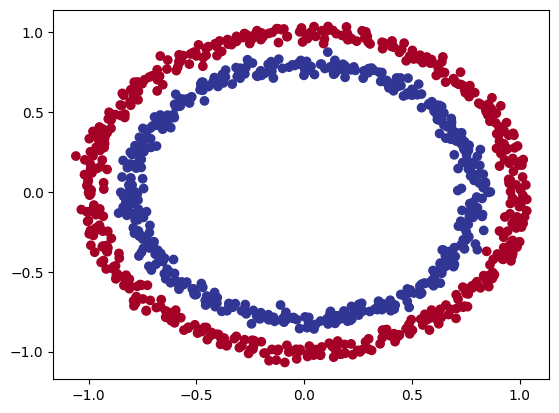

In [ ]:
n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42
                   )
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
#converting data to tensors and then train,test splits
if (type(X) != torch.Tensor and type(y) != torch.Tensor):
  X = torch.from_numpy(X).type(torch.float)
  y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

X_train[:5], y_train[:5]


#building a model
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() #non linear activation function

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3().to(device)
model_3 #we successfully created non-linear model


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

Loss 0.0312795452773571 | Acc 99.875 | Test Loss 0.05359596386551857 | Test Acc 100.0
Loss 0.028106754645705223 | Acc 99.875 | Test Loss 0.04940290004014969 | Test Acc 100.0
Loss 0.025538833811879158 | Acc 99.875 | Test Loss 0.04594483971595764 | Test Acc 100.0
Loss 0.023411208763718605 | Acc 99.875 | Test Loss 0.04305174946784973 | Test Acc 100.0
Loss 0.021598098799586296 | Acc 99.875 | Test Loss 0.040388382971286774 | Test Acc 100.0
Loss 0.02005009911954403 | Acc 99.875 | Test Loss 0.038241807371377945 | Test Acc 100.0
Loss 0.018709449097514153 | Acc 99.875 | Test Loss 0.03642734885215759 | Test Acc 100.0
Loss 0.017540983855724335 | Acc 99.875 | Test Loss 0.03478625416755676 | Test Acc 100.0
Loss 0.016509955748915672 | Acc 99.875 | Test Loss 0.033335063606500626 | Test Acc 100.0
Loss 0.015593482181429863 | Acc 99.875 | Test Loss 0.03206520900130272 | Test Acc 100.0


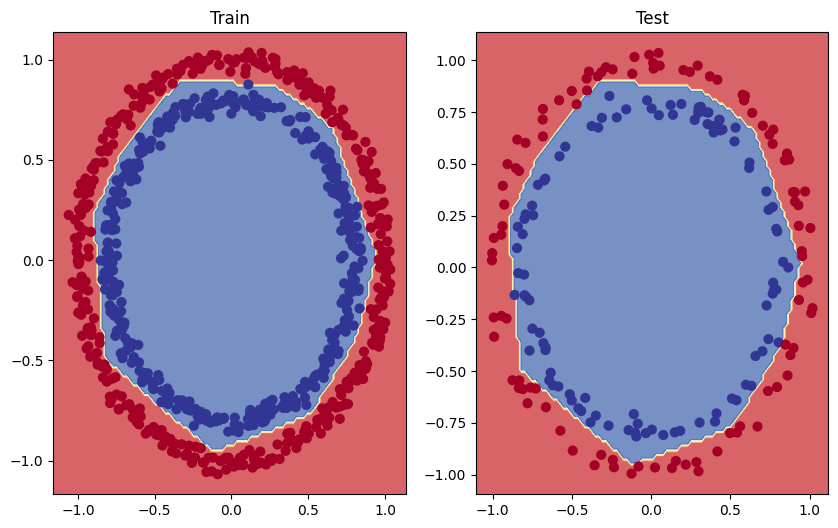

In [ ]:
epochs = 1000
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)
for epoch in range(epochs):

  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_labels = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_labels)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    y_prediction_logits= model_3(X_test).squeeze()

    precition_labels= torch.round(torch.sigmoid(y_prediction_logits))

    test_loss = loss_fn(y_prediction_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = precition_labels)
  if epoch % 100 == 0:
    print(f"Loss {loss} | Acc {acc} | Test Loss {test_loss} | Test Acc {test_acc}")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test, y_test)


It's still not a perfect model but with relu layer it actually started to learn (model became better after runing it a couple of extra times)

#Replicating non-linear activation functions

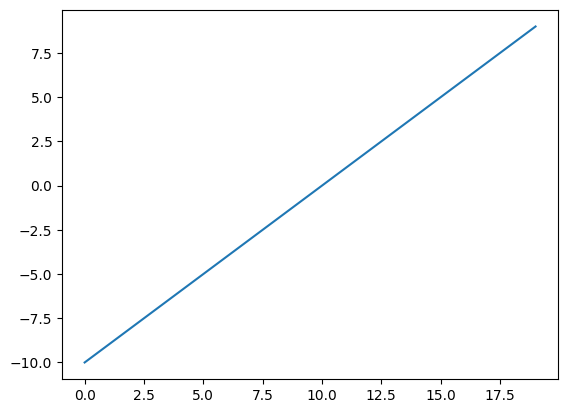

In [ ]:
A = torch.arange(-10, 10, 1.0,)
A.dtype
plt.plot(A)

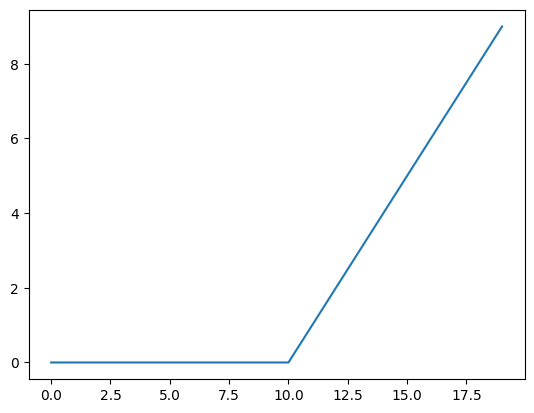

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x : torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

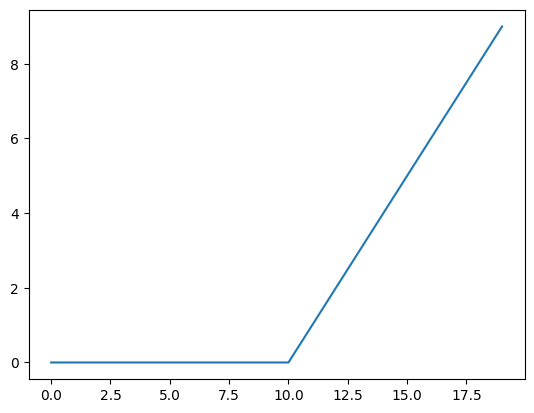

In [ ]:
plt.plot(relu(A))

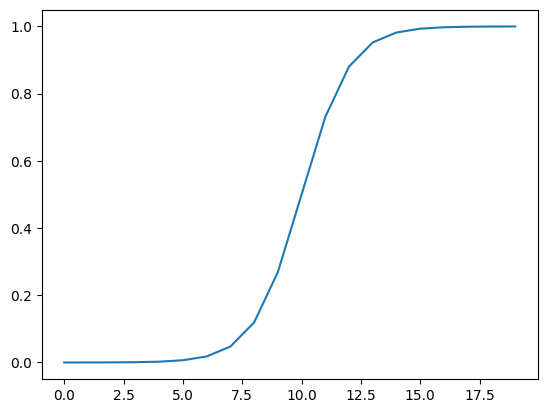

In [ ]:
def sigmoid(x):
  return 1/ (1 +torch.exp(-x))

plt.plot(torch.sigmoid(A))

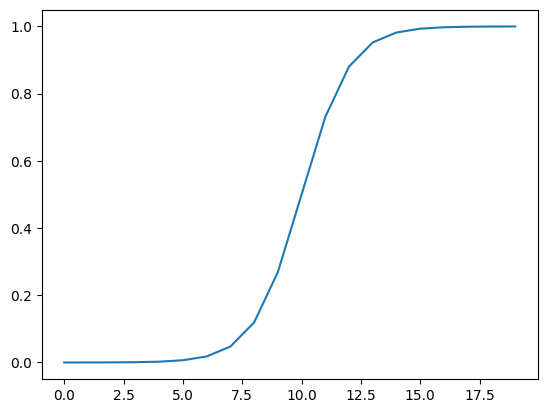

In [ ]:
plt.plot(sigmoid(A))

# Creating a multi class dataset

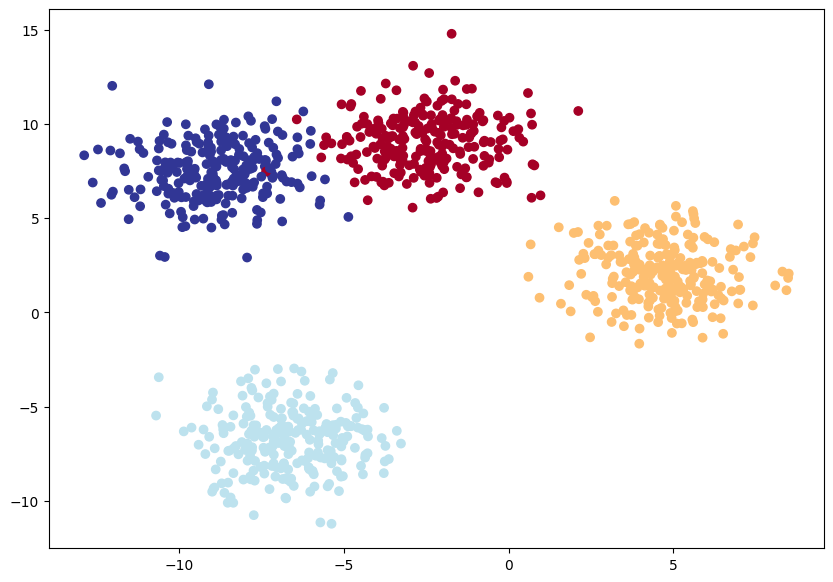

In [ ]:
from sklearn.datasets import make_blobs

#Hyperparameters for data

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


#creating muli class data
x_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED
                            )


#turning data to tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#split into train and test
x_blob_train , x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
  y_blob,
  test_size = 0.2,
  random_state = RANDOM_SEED
)

#plot data
plt.figure(figsize = (10,7))
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)

### Building multi class clasification model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units =8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features),
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features = NUM_FEATURES,
                    output_features= NUM_CLASSES,
                    hidden_units = 8).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(),lr = 0.01)


In [ ]:


with torch.inference_mode():
  logits = model_4(x_blob_test)

logits[:10], y_blob_test[:10]
#they are in a completely different format
#each number in y_blob_test has 4 numbers associated to it in preds, because
#they are logits, we need to convert them to prediction probabilities and then labels


(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [ ]:
torch.unique(y_blob_test) # 4 unique classes

#for multiclasss clasification we need a softmax activation function

pred_probs = torch.softmax(logits, dim =1)
print(logits[:5])
print(pred_probs[:5])


tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]])
tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]])


In [ ]:
#our prediction probabilities are still in a different format

torch.sum(pred_probs[1])

tensor(1.0000)

if we sum up each line of prediction probabilities we get 1. that's because each element corresponds to the probability of each class using indeces.

In [ ]:
#using argmax we get the prediction of the model, of which class should it be

torch.argmax(pred_probs[1])

tensor(2)

In [ ]:
#so to get the labels we need to use argmax on prediction probabilities
labels = torch.argmax(pred_probs, dim=1)
labels[:5], y_blob_test[:5]

(tensor([1, 2, 1, 1, 2]), tensor([1., 3., 2., 1., 0.]))

now our predictions and tests are in the same format, predictions are wrong because we have not trained the model yet

so from the forward function of the model we get raw logits, then we should convert those logits to preidction probabilities using torch.softmax, and finally we should get the prediction labels using torch.argmax

In [ ]:
#now we should create training and testing loops

y_blob_train.type(torch.LongTensor)
y_blob_test.type(torch.LongTensor)

torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(x_blob_train)
  y_labels = torch.softmax(y_logits, dim =1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_labels)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #now testing

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(x_blob_test)
    test_labels = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_labels)
    if epoch % 10 == 0:
      print(f"epochs{epoch} Loss: {loss} | Acc: {acc}, | Test_loss: {test_loss}, | Test Acc {test_acc}")

epochs0 Loss: 0.6413015723228455 | Acc: 96.875, | Test_loss: 0.6785883903503418, | Test Acc 97.0
epochs10 Loss: 0.6167028546333313 | Acc: 97.75, | Test_loss: 0.6532230377197266, | Test Acc 97.5
epochs20 Loss: 0.5927860140800476 | Acc: 97.75, | Test_loss: 0.6282913088798523, | Test Acc 98.0
epochs30 Loss: 0.5692605972290039 | Acc: 98.0, | Test_loss: 0.6035528182983398, | Test Acc 98.0
epochs40 Loss: 0.5461142063140869 | Acc: 98.25, | Test_loss: 0.5790688991546631, | Test Acc 99.5
epochs50 Loss: 0.5233957767486572 | Acc: 98.5, | Test_loss: 0.5548336505889893, | Test Acc 99.5
epochs60 Loss: 0.5010336637496948 | Acc: 98.625, | Test_loss: 0.5309485197067261, | Test Acc 99.5
epochs70 Loss: 0.47908660769462585 | Acc: 98.375, | Test_loss: 0.5074251294136047, | Test Acc 99.5
epochs80 Loss: 0.4577195346355438 | Acc: 98.375, | Test_loss: 0.48439833521842957, | Test Acc 99.5
epochs90 Loss: 0.4369984567165375 | Acc: 98.5, | Test_loss: 0.46193790435791016, | Test Acc 99.5


## Now let's make the predictions

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test)

#we got the logits now lets get the probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_labels = torch.argmax(y_pred_probs, dim =1)

print(y_blob_test == y_pred_labels)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

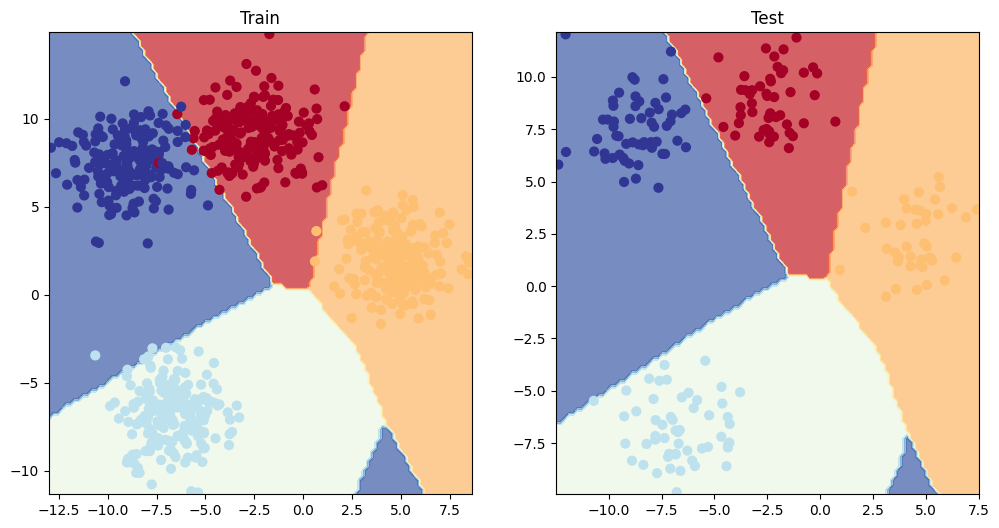

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)

But apperantly this data we have was linearly separable, we could have trained the model with only linear layers.